In [2]:
from pathlib import Path
from matplotlib import pyplot as plt

In [12]:
image_dir = Path('/Users/s02836/peinan7@gmail.com - Google Drive/マイドライブ/Project/ao-paradox/data/exp2')
image_names = [
    'traffic_light',
    'apple',
    'green_vegetable',
    'aojiru',
]
image_paths = {
    name: sorted(list(image_dir.glob(f'{name}-resized-hueshift/*.jpg')))
    for name in image_names
}

print(image_names)

['traffic_light', 'apple', 'green_vegetable', 'aojiru']


In [13]:
import numpy as np
from PIL import Image
import re

def get_hue_from_filename(filepath: Path) -> int | None:
    match = re.search(r'h(\d+)', filepath.name)  # e.g. h60.png
    if match:
        return int(match.group(1))
    return None


image_data = {}
for name, paths in image_paths.items():
    image_data[name] = {}
    for path in paths:
        hue = get_hue_from_filename(path)
        image_data[name][hue] = path

hues = list(image_data['traffic_light'].keys())
hues_use = [h for h in hues if h % 30 == 0]

print(f"{len(image_names)=}")
print(f"{len(image_data)=}")
print(f"{len(hues)=}, {hues[0]=}, {hues[-1]=}")
print(f"{len(hues_use)=}, {hues_use}")

len(image_names)=4
len(image_data)=4
len(hues)=242, hues[0]=60, hues[-1]=301
len(hues_use)=9, [60, 90, 120, 150, 180, 210, 240, 270, 300]


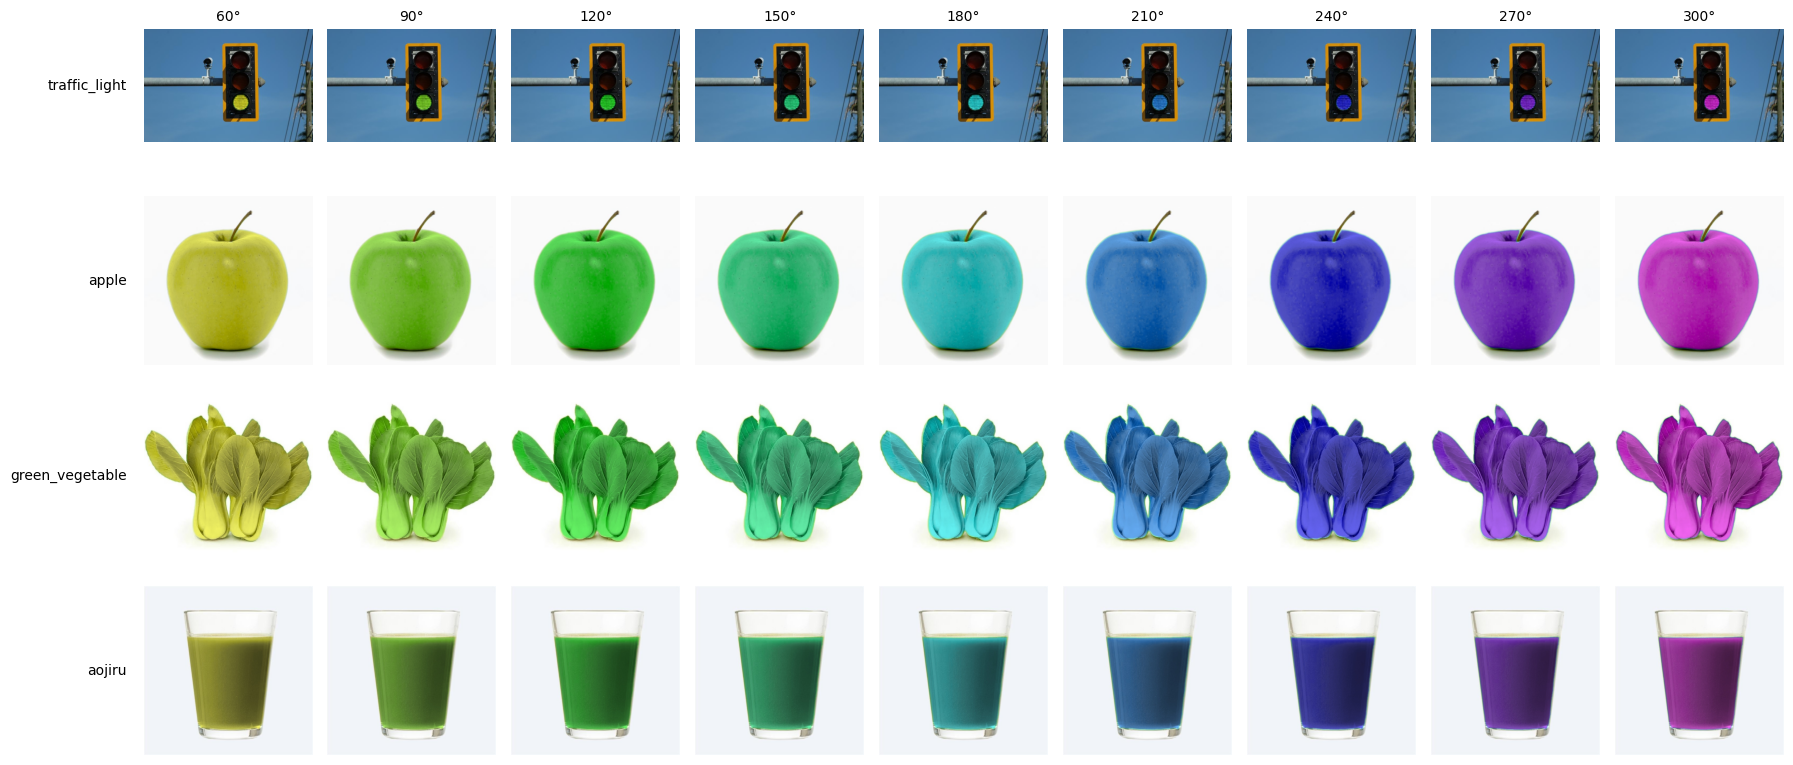

In [14]:
# グリッド表示の作成
n_rows = len(image_names)
n_cols = len(hues_use)

# 図のサイズを設定（各画像のサイズに応じて調整）
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))

# 1行1列の場合は axes を2次元配列に変換
if n_rows == 1:
    axes = axes.reshape(1, -1)
elif n_cols == 1:
    axes = axes.reshape(-1, 1)

# 各セルに画像を表示
for i, image_name in enumerate(image_names):
    for j, hue_shift in enumerate(hues_use):
        ax = axes[i, j]

        # 該当する画像パスを取得
        if hue_shift in image_data.get(image_name, {}):
            img_path = image_data[image_name][hue_shift]
            try:
                img = Image.open(img_path)
                ax.imshow(img)
            except Exception as e:
                ax.text(0.5, 0.5, f'Error\n{str(e)}',
                       ha='center', va='center', transform=ax.transAxes)
        else:
            ax.text(0.5, 0.5, 'N/A', ha='center', va='center',
                   transform=ax.transAxes, fontsize=12)

        # 軸の設定
        ax.axis('off')

        # 最初の行に hue_shift のラベルを追加
        if i == 0:
            ax.set_title(f'{hue_shift}°', fontsize=10)

        # 最初の列に image_name のラベルを追加
        if j == 0:
            ax.text(-0.1, 0.5, image_name, ha='right', va='center',
                   transform=ax.transAxes, fontsize=10, rotation=0)

plt.tight_layout()
plt.show()